This notebook allows to reproduce **Figure 9** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Thomas Jacobs, Tom Ruttink and Bernard De Baets.

#### Load packages

In [38]:
using Random 
using Plots  
using Distributions 
using StatsPlots
using LinearAlgebra
using Combinatorics
using BioCCP

#### Load BioCCP- and simulation-based framework

In [39]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [40]:
Random.seed!(1)

TaskLocalRNG()

- Figure 9A: Distribution of knockouts for standard multiplex CRISPR/Cas approach (*r* = *k* = 2)

In [41]:
include("DefaultParameters_k=2.jl");

In [42]:
ϵ_KO = 0.9
n_KOs_90 = simulate_Nₓ₂_countKOs(x, 
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO; iter=500)
ϵ_KO = 0.8
n_KOs_80 = simulate_Nₓ₂_countKOs(x, 
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO; iter=500)
ϵ_KO = 0.7
n_KOs_70 = simulate_Nₓ₂_countKOs(x, 
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO; iter=500);

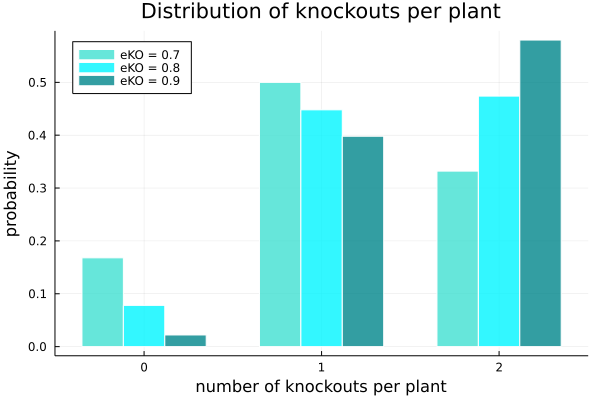

In [43]:
d_KOs_70 = normalize([sum(n_KOs_70 .== 0), sum(n_KOs_70 .== 1), sum(n_KOs_70 .== 2)], 1);
d_KOs_80 = normalize([sum(n_KOs_80 .== 0), sum(n_KOs_80 .== 1), sum(n_KOs_80 .== 2)], 1);
d_KOs_90 = normalize([sum(n_KOs_90 .== 0), sum(n_KOs_90 .== 1), sum(n_KOs_90 .== 2)], 1);

ticklabel = string.(collect('0':'6'))
groupedbar([d_KOs_70 d_KOs_80 d_KOs_90], bar_position = :dodge, bar_width=0.7, xticks=(1:36, ticklabel),
fill=[:turquoise :turquoise1 :turquoise4], linecolor=:white, fillalpha=0.8, label=["eKO = 0.7" "eKO = 0.8" "eKO = 0.9"],
size = (600, 400), legend=:topleft,
xlabel="number of knockouts per plant", ylabel="probability", title="Distribution of knockouts per plant")


- Figure 9B: Distribution of knockouts per plant in *Overshoot* scenario (*r* = 6 > *k* = 2)

In [44]:
r = 6 # overshoot

ϵ_KO = 0.7
n_KOs_overshoot6_70 = simulate_Nₓ₂_countKOs(x, 
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO; iter=500)
ϵ_KO = 0.8
n_KOs_overshoot6_80 = simulate_Nₓ₂_countKOs(x, 
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO; iter=500)
ϵ_KO = 0.9
n_KOs_overshoot6_90 = simulate_Nₓ₂_countKOs(x, 
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO; iter=500);

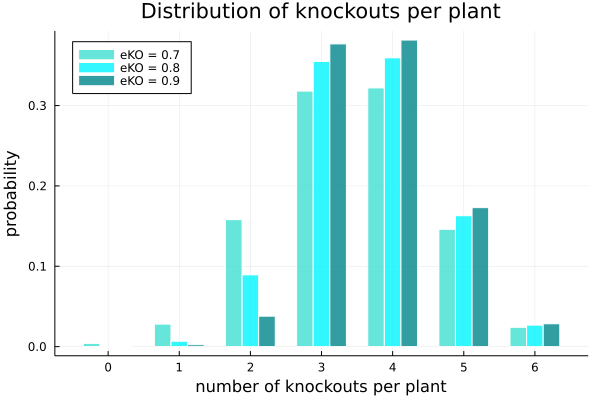

In [45]:
d_KOs_overshoot6_70 = normalize([sum(n_KOs_overshoot6_70 .== 0), sum(n_KOs_overshoot6_70 .== 1), sum(n_KOs_overshoot6_70 .== 2), sum(n_KOs_overshoot6_70 .== 3), sum(n_KOs_overshoot6_70 .== 4), sum(n_KOs_overshoot6_70 .== 5), sum(n_KOs_overshoot6_70 .== 6)], 1)
d_KOs_overshoot6_80 = normalize([sum(n_KOs_overshoot6_80 .== 0), sum(n_KOs_overshoot6_80 .== 1), sum(n_KOs_overshoot6_80 .== 2), sum(n_KOs_overshoot6_70 .== 3), sum(n_KOs_overshoot6_70 .== 4), sum(n_KOs_overshoot6_70 .== 5), sum(n_KOs_overshoot6_70 .== 6)], 1)
d_KOs_overshoot6_90 = normalize([sum(n_KOs_overshoot6_90 .== 0), sum(n_KOs_overshoot6_90 .== 1), sum(n_KOs_overshoot6_90 .== 2), sum(n_KOs_overshoot6_70 .== 3), sum(n_KOs_overshoot6_70 .== 4), sum(n_KOs_overshoot6_70 .== 5), sum(n_KOs_overshoot6_70 .== 6)], 1)

ticklabel = string.(collect('0':'6'));

groupedbar([d_KOs_overshoot6_70 d_KOs_overshoot6_80 d_KOs_overshoot6_90], bar_position = :dodge, 
    linecolor=:white,
   fill=[:turquoise :turquoise1 :turquoise4],
    bar_width=0.7, xticks=(1:18, ticklabel), fillalpha=0.8,
xlabel="number of knockouts per plant", ylabel="probability", 
    title="Distribution of knockouts per plant", 
label=["eKO = 0.7" "eKO = 0.8" "eKO = 0.9"], legend=:topleft,size = (600, 400))